# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyen Minh Nhat
- MSSV: 22127309
- Lớp: 22CLC05

# Import

In [81]:
import pandas as pd
import numpy as np
# Import thêm dữ thư viện nếu cần
import matplotlib.pyplot as plt
import typing
import seaborn as sns 

# Đọc dữ liệu

In [82]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng cách khác nếu cần

#n = 800
#X_train_np = X_train.head(n).to_numpy()
#y_train_np = y_train.head(n).to_numpy()

#X_test_np = X_test.head(n).to_numpy()
#y_test_np = y_test.head(n).to_numpy()


X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()
features = X_train.columns

# Cài đặt hàm

In [83]:
# Cài đặt các hàm cần thiết ở đây
def apply_coef_and_power(x: np.ndarray, coef: np.ndarray, power: np.ndarray) -> np.ndarray:
    '''
    Apply the coefficients and powers to the input data.
    

    Parameters
    ----------
    x : np.array
        Input data
    coef : np.array
    power : np.array

    Returns
    -------
    np.array
        Transformed input data
    '''


    x = np.array(x)
    for i in range(x.shape[1]):
        x[:, i] = coef[i] * np.power(x[:, i], power[i])
    return x


class OLSLinearRegression:
    def __init__(self, linear_function: typing.Callable | None = None):
        self.weights = np.array([])
        self.linear_function = linear_function

    def preprocess(self, X: np.ndarray) -> np.ndarray:
        if self.linear_function is not None:
            X = self.linear_function(X)
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def fit(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        ''' 
        Fit the model to the data using the Ordinary Least Squares method to find the optimal parameters.
        
        Parameters
        ----------
        X : np.array
            Input data
        y : np.array
            Output data

        Returns
        -------
        np.array
            Weights of the model
        '''
        X_processed = self.preprocess(X)
        X_pseudo_invert = np.linalg.pinv(X_processed)
        self.weights = np.dot(X_pseudo_invert, y)
        return self.weights

    def predict(self, X: np.ndarray) -> np.ndarray:
        ''' 
        Predict the output values for the input data.

        Parameters
        ----------
        X : np.array
            Input data
        
        Returns
        -------
        np.array
            Predicted output values
        '''
        if self.weights is None:
            raise ValueError("Model is not fitted yet. Call 'fit' with training data first.")
        X_processed = self.preprocess(X)
        return X_processed @ self.weights
    
    def get_formula(self, features: pd.Index) -> str:
        ''' 
        Get the formula of the linear regression model.

        Parameters
        ----------
        features : pd.Index
            Features of the data
        
        Returns
        -------
        str
            Formula of the linear regression model
        '''
        formula = "y = "
        for i in range(len(features)):
            formula += f"{self.weights[i + 1]:.3f} * {features[i]} + "
        formula += f"{self.weights[0]:.3f}"
        return formula
    
def mean_absolute_error(y_true: np.ndarray, y_pred: np.ndarray) -> np.float64:
    ''' 
    Calculate the mean absolute error between the true output values and the predicted output values.

    Parameters
    ----------
    y_true : np.array
        True output values
    y_pred : np.array
        Predicted output values
    
    Returns
    -------
    float
        Mean absolute error
    '''
    return np.mean(np.abs(y_true - y_pred))


def k_fold_cross_validation(X : np.ndarray, y : np.ndarray, k : int = 5, linear_function: typing.Callable | None = None) -> np.float64:
    ''' 
    This function is used to perform k-fold cross-validation. 
    It splits the data into k parts, then trains the model on k-1 parts and validates it on the remaining part. 
    This process is repeated k times with each part being used as the validation set exactly once.

    Parameters
    ----------
    X : np.array
        Input data
    y : np.array
        Output data
    k : int
        Number of folds
    
    Returns
    -------
    float
        Average mean absolute error
    '''
    linear_model = OLSLinearRegression(linear_function)
    n = X.shape[0]
    fold_size = n // k
    total_error = np.float64(0)
    for i in range(k):
        subset_start = fold_size * i 
        subset_end   = fold_size * (i + 1)
        X_test = X[subset_start : subset_end]
        y_test = y[subset_start : subset_end]
        X_train  = np.concatenate((X[:subset_start], X[subset_end:]))
        y_train  = np.concatenate((y[:subset_start], y[subset_end:]))
        weights = linear_model.fit(X_train, y_train)
        y_pred  = linear_model.predict(X_test)
        total_error += mean_absolute_error(y_test, y_pred)
    return total_error / k


*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

In [84]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện

In [85]:
#get description of data
train.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4.976444,69.396111,0.493667,6.535556,4.590889,55.136333
std,2.594647,17.369957,0.499988,1.695533,2.864570,19.187669
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


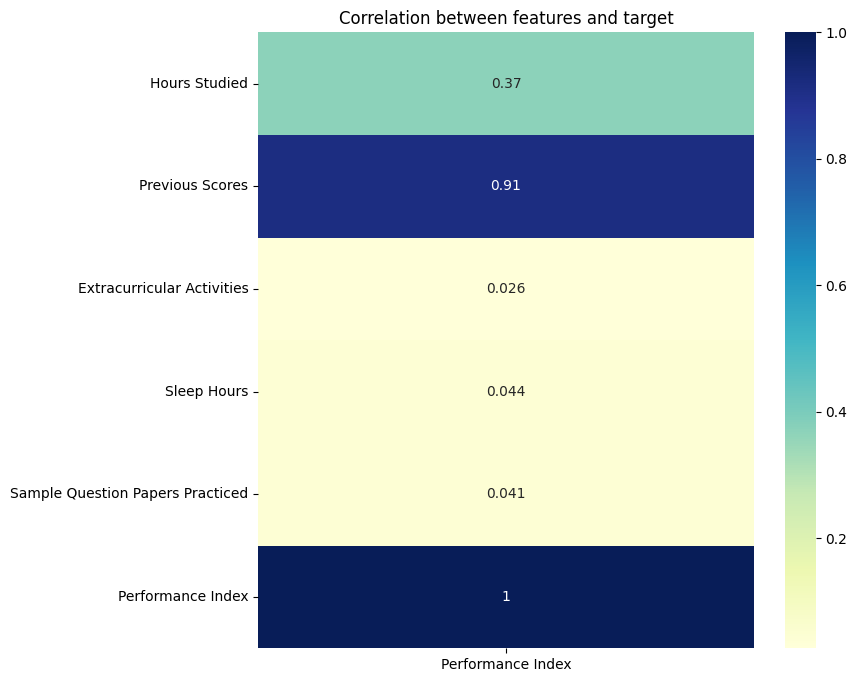

In [103]:

#Get correlation between features and target
correlation = train.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation[['Performance Index']], cmap="YlGnBu", annot=True)
plt.title('Correlation between features and target')
plt.show()

It is observable that the correlation matrix above uses the Pearson correlation coefficient. This coefficient ranges from -1 to 1, with 
* &nbsp; 1 meaning a perfect positive linear relationship,
* -1 meaning a perfect negative linear relationship, and
* &nbsp;0 meaning no linear relationship between the two variables.


These values can be interpreted as follows:
* Hours Studied: 0.37 (moderate positive correlation)
* Previous Scores: 0.91 (strong positive correlation)
* Extracurricular Activities: 0.026 (weak positive correlation)
* Sleep Hours: 0.041 (weak positive correlation)
* Sample Questions Papers Practiced: 0.041 (weak positive correlation)

These numbers are positive showing that all features have a positive correlation with the target variable. The strongest correlation is between the previous scores and the target variable, while other features have a weak correlation with the target variable.

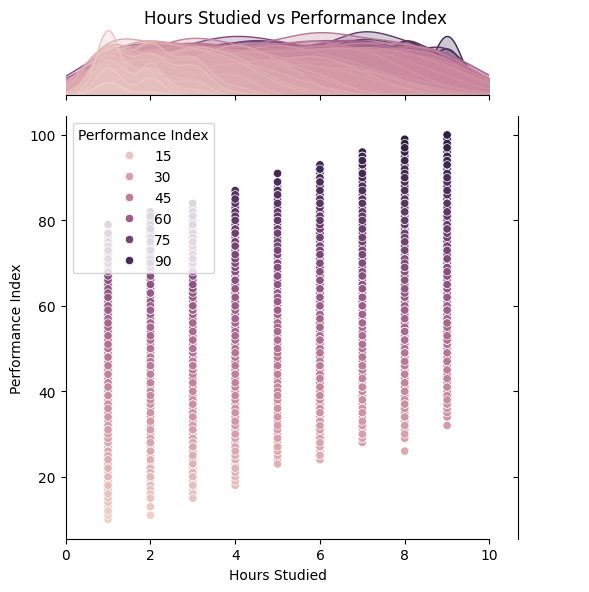

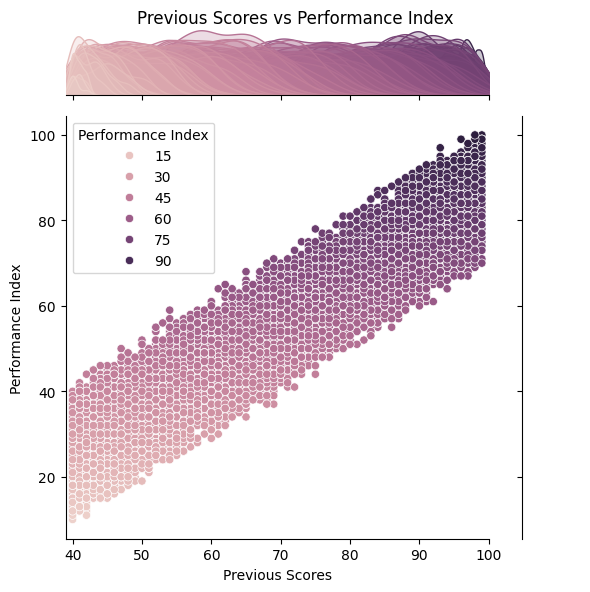

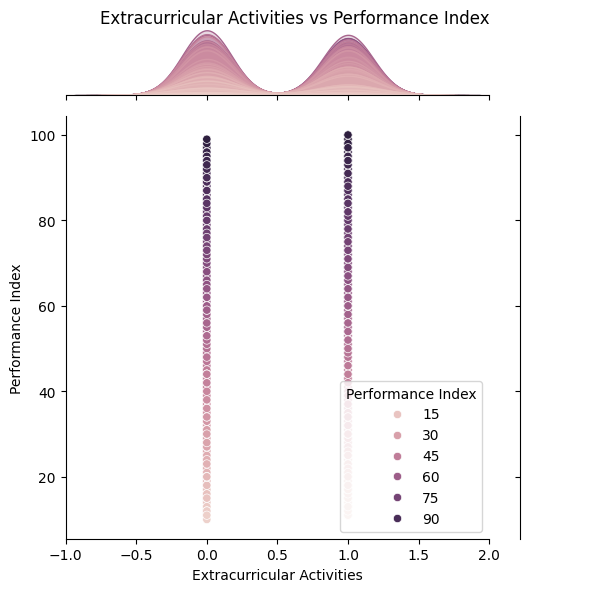

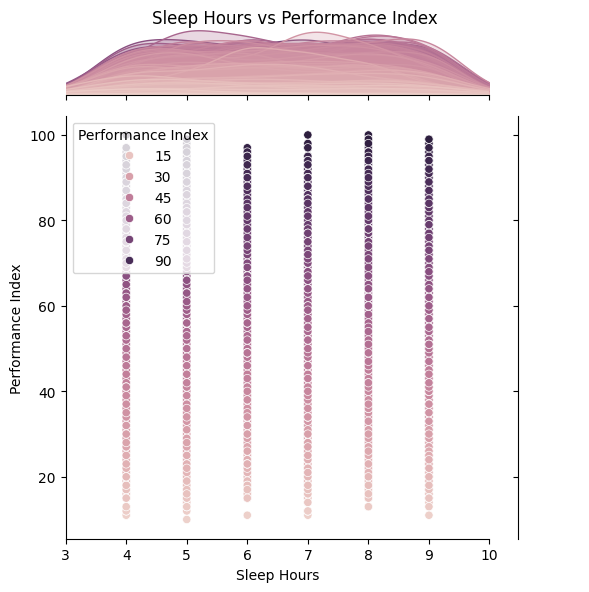

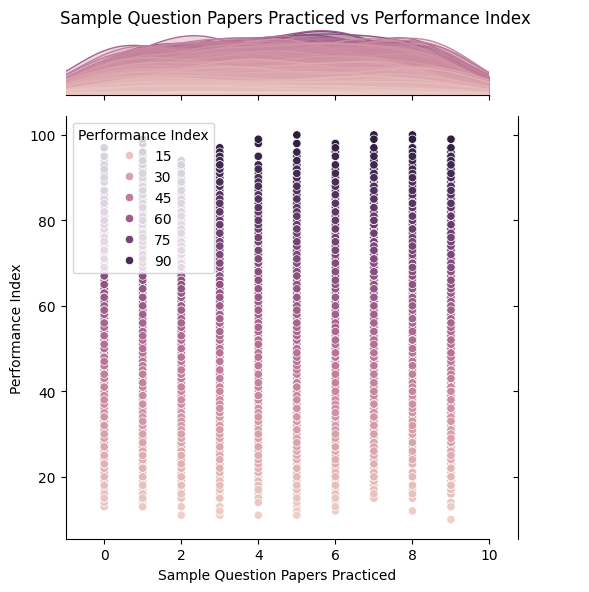

In [87]:
for i in train.columns[:-1]:
    g = sns.jointplot(x=i, y='Performance Index', data=train, hue='Performance Index', kind='scatter')
    g.ax_joint.set_xlim(train[i].min() - 1, train[i].max() + 1) 
    g.figure.suptitle(f'{i} vs Performance Index')
    g.figure.tight_layout()
    g.figure.subplots_adjust(top=0.95)

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [88]:
# Phần code cho yêu cầu 2a
linear_model = OLSLinearRegression()
weights = linear_model.fit(X_train_np, y_train_np)
print("Formula of the linear regression model:")
print(linear_model.get_formula(features))

Formula of the linear regression model:
y = 2.852 * Hours Studied + 1.018 * Previous Scores + 0.604 * Extracurricular Activities + 0.474 * Sleep Hours + 0.192 * Sample Question Papers Practiced + -33.969


In [89]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
y_pred = linear_model.predict(X_test_np)
mae = mean_absolute_error(y_test_np, y_pred)
print('Mean Absolute Error on training set:', mae)

Mean Absolute Error on training set: 1.5956486884762948


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = 1.596$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [90]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu

k = 20
rng = np.random.default_rng()
n_rows = X_train_np.shape[0]
n_cols = X_train_np.shape[1]
shuffled_indices = rng.permutation(n_rows)
shuffled_X = X_train_np[shuffled_indices]
shuffle_y  = y_train_np[shuffled_indices]
feature_cross_validation_error = np.zeros(n_cols)
for i in range(n_cols):
    feature_cross_validation_error[i] = k_fold_cross_validation(shuffled_X[:,i].reshape(-1, 1), #reshape 1D array (n, ) to 2D array (n, 1) 
                            shuffle_y, 
                            5)
df = pd.DataFrame(X_train.columns, columns=['Model with 1 feature'])
df.index = pd.RangeIndex(start=1, stop=6, step=1)
df['MAE'] = feature_cross_validation_error
df

,Model with 1 feature,MAE
1,Hours Studied,15.452702
2,Previous Scores,6.618853
3,Extracurricular Activities,16.199082
4,Sleep Hours,16.188669
5,Sample Question Papers Practiced,16.187349


In [91]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_feature_model = OLSLinearRegression()
best_feature_index = np.argmin(feature_cross_validation_error)
best_feature = X_train.columns[int(best_feature_index)]
print('Best feature:', best_feature)
feature_index = X_train.columns.get_loc(best_feature)
X_train_best_feature = X_train_np[:, feature_index].reshape(-1, 1)
y_train_best_feature = y_train_np
best_feature_model_weights = best_feature_model.fit(X_train_best_feature, y_train_best_feature)
print("Formula of the linear regression model with the best feature:")
print(best_feature_model.get_formula(features[[feature_index]])) #type: ignore

Best feature: Previous Scores
Formula of the linear regression model with the best feature:
y = 1.011 * Previous Scores + -14.989


In [92]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
y_pred = best_feature_model.predict(X_test_np[:, feature_index].reshape(-1, 1))
mae = mean_absolute_error(y_test_np, y_pred)
print('Mean Absolute Error on test set:', mae)

Mean Absolute Error on test set: 6.544277293452511


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = 6.544$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [93]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình
coef = np.zeros((5, 5), dtype=np.float64)
power = np.zeros((5, 5), dtype=np.float64)

**First design** <br>
Normalize the data using cross-validation based on best feature. <br>
Then, use the normalized data to build a linear regression model. <br>


| No | **Feature**                     | Cross validation| Coefficient | 
|-----|---------------------------------|----------------|-------------|
|  1  | Hours Studied		            | 15.449913      |$ 6.618343 / 15.449913 = 0.428$|
|  2  | Previous Scores				    | 6.618343       |$ 6.618343 / 6.618343 = 1$|
|  3  | Extracurricular Activities		| 16.195993	     |$ 6.618343 / 16.195993 = 0.409$|
|  4  | Sample Question Papers Practiced| 16.185144      |$ 6.618343 / 16.185144 = 0.409$|
|  5  | Sleep Hours						| 16.187000      |$ 6.618343 / 16.187000 = 0.409$|

In [94]:
#first model
coef[0] = np.array([0.428, 1, 0.409, 0.409, 0.409])
power[0] = np.array([1, 1, 1, 1, 1])

**Second design** <br>
Normalize the data using Pearson correlation coefficient. <br>
Then, use the normalized data to build a linear regression model. <br>

| No | **Feature**                     | Pearson correlation coefficient| Coefficient |
|-----|---------------------------------|----------------|-------------|
|  1  | Hours Studied		            | 0.37           |$ 0.37 / 0.91 = 0.407$| 
|  2  | Previous Scores				    | 0.91           |$ 0.91 / 0.91 = 1$|
|  3  | Extracurricular Activities		| 0.026	         |$ 0.026 / 0.91 = 0.029$|
|  4  | Sample Question Papers Practiced| 0.041          |$ 0.041 / 0.91 = 0.045$|
|  5  | Sleep Hours						| 0.041          |$ 0.041 / 0.91 = 0.045$|


In [95]:
#second model
coef[1] = np.array([0.407, 1, 0.029, 0.045, 0.045])
power[1] = np.array([1, 1, 1, 1, 1])

**Third design** <br>
Apply coefficient based on Pearson correlation coefficient rank

| No | **Feature**                     | Pearson correlation coefficient| Coefficient/Rank |
|-----|---------------------------------|----------------|-------------|
|  1  | Hours Studied		            | 0.37           |$ 3$|
|  2  | Previous Scores				    | 0.91           |$ 4$|
|  3  | Extracurricular Activities		| 0.026	         |$ 1$|
|  4  | Sample Question Papers Practiced| 0.041          |$ 2$|
|  5  | Sleep Hours						| 0.041          |$ 2$|

In [96]:
#third model
coef[2] = np.array([3, 4, 1, 2, 2])
power[2] = np.array([1, 1, 1, 1, 1])

**Forth design** <br>
Apply power indices based on Pearson correlation coefficient rank

| No | **Feature**                     | Pearson correlation coefficient| Power Indices/Rank |
|-----|---------------------------------|----------------|-------------|
|  1  | Hours Studied		            | 0.37           |$ 3$|
|  2  | Previous Scores				    | 0.91           |$ 4$|
|  3  | Extracurricular Activities		| 0.026	         |$ 1$|
|  4  | Sample Question Papers Practiced| 0.041          |$ 2$|
|  5  | Sleep Hours						| 0.041          |$ 2$|

In [97]:
#forth model
coef[3] = np.array([1, 1, 1, 1, 1])
power[3] = np.array([3, 4, 1, 2, 2])

**Fifth design** <br>
Brute force to find 
* best coefficients from 0 to 7 
* with power of all features are [0.9, 1, 1.1]

| No | **Feature**                     | Coefficient | Power indices |
|-----|---------------------------------|-------------|--|
|  1  | Hours Studied		            | 2         | 1 |
|  2  | Previous Scores				    | 6         | 1 |
|  3  | Extracurricular Activities		| 1         | 1 |
|  4  | Sample Question Papers Practiced| 1         | 1 |
|  5  | Sleep Hours						| 1         | 1 |

**Brute force to find best coefficients and power indices** <br>
```python
from itertools import product
n = 9000
X_train_np = X_train.head(n).to_numpy()
y_train_np = y_train.head(n).to_numpy()

X_test_np = X_test.head(n).to_numpy()
y_test_np = y_test.head(n).to_numpy()

coef_range = np.linspace(0, 7, 8)
power_range = np.array([0.9, 1 ,1.1])
# Initialize the best MAE and corresponding coef and power
best_kfold = np.float64(1.e9)
best_coef = None
best_power = None
# Perform grid search
for coef in product(coef_range, repeat=5):
    for power in product(power_range, repeat=5):
        coef_np = np.array(coef)
        power_np = np.array(power)
        mae = k_fold_cross_validation(X_train_np, y_train_np, 5, lambda x: apply_coef_and_power(x, coef_np, power_np))
        if mae <= best_kfold:
            best_kfold = mae
            best_coef = coef_np
            best_power = power_np
            print(best_kfold)
            print(best_coef)
            print(best_power)
```

In [98]:
#fifth model
coef[4] = np.array([2, 6, 1, 1, 1])
power[4] = np.array([1, 1, 1, 1, 1])

## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [99]:
# Phần code cho yêu cầu 2c
models = ['Normalized cross_validation', 'Normalized Pearson correlation', 'Coefficient with correlation order', 'Power with correlation order', 'Brute force']
custom_MAES = np.array(5 * [0.0], dtype=np.float64)
rng = np.random.default_rng()
shuffled_indices = rng.permutation(n_rows)
shuffled_X = X_train_np[shuffled_indices]
shuffle_y  = y_train_np[shuffled_indices]

for i in range(5):
    custom_MAES[i] = k_fold_cross_validation(shuffled_X, shuffle_y, 5, lambda x: apply_coef_and_power(x, coef[i], power[i]))

# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
best_model_index = np.argmin(custom_MAES)
print('Best model:', models[best_model_index])

# In ra các kết quả cross-validation như yêu cầu
df = pd.DataFrame(models, columns=['Model'])
df['MAE'] = custom_MAES
df.index = pd.RangeIndex(start=1, stop=6, step=1)
df

Best model: Brute force


,Model,MAE
1,Normalized cross_validation,2.248576
2,Normalized Pearson correlation,2.368353
3,Coefficient with correlation order,1.620954
4,Power with correlation order,5.152410
5,Brute force,1.620954


In [100]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
my_best_model = OLSLinearRegression(lambda x: apply_coef_and_power(x, coef[best_model_index], power[best_model_index]))
my_best_model_weights = my_best_model.fit(X_train_np, y_train_np)
print("Formula of the best model:")
print(my_best_model.get_formula(features))

Formula of the best model:
y = 1.426 * Hours Studied + 0.170 * Previous Scores + 0.604 * Extracurricular Activities + 0.474 * Sleep Hours + 0.192 * Sample Question Papers Practiced + -33.969


In [101]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
y_pred = my_best_model.predict(X_test_np)
mae = mean_absolute_error(y_test_np, y_pred)
print('Mean Absolute Error on test set:', mae)

Mean Absolute Error on test set: 1.5956486884762682


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = 1.599$$